We will learn here how to use ARIMA() model for Non-seasonal univariate time series. Although, ARIMA() model can be used to multivariate, seasonal time series.

In [1]:
lynx

Time Series:
Start = 1821 
End = 1934 
Frequency = 1 
  [1]  269  321  585  871 1475 2821 3928 5943 4950 2577  523   98  184  279  409
 [16] 2285 2685 3409 1824  409  151   45   68  213  546 1033 2129 2536  957  361
 [31]  377  225  360  731 1638 2725 2871 2119  684  299  236  245  552 1623 3311
 [46] 6721 4254  687  255  473  358  784 1594 1676 2251 1426  756  299  201  229
 [61]  469  736 2042 2811 4431 2511  389   73   39   49   59  188  377 1292 4031
 [76] 3495  587  105  153  387  758 1307 3465 6991 6313 3794 1836  345  382  808
 [91] 1388 2713 3800 3091 2985 3790  674   81   80  108  229  399 1132 2432 3574
[106] 2935 1537  529  485  662 1000 1590 2657 3396

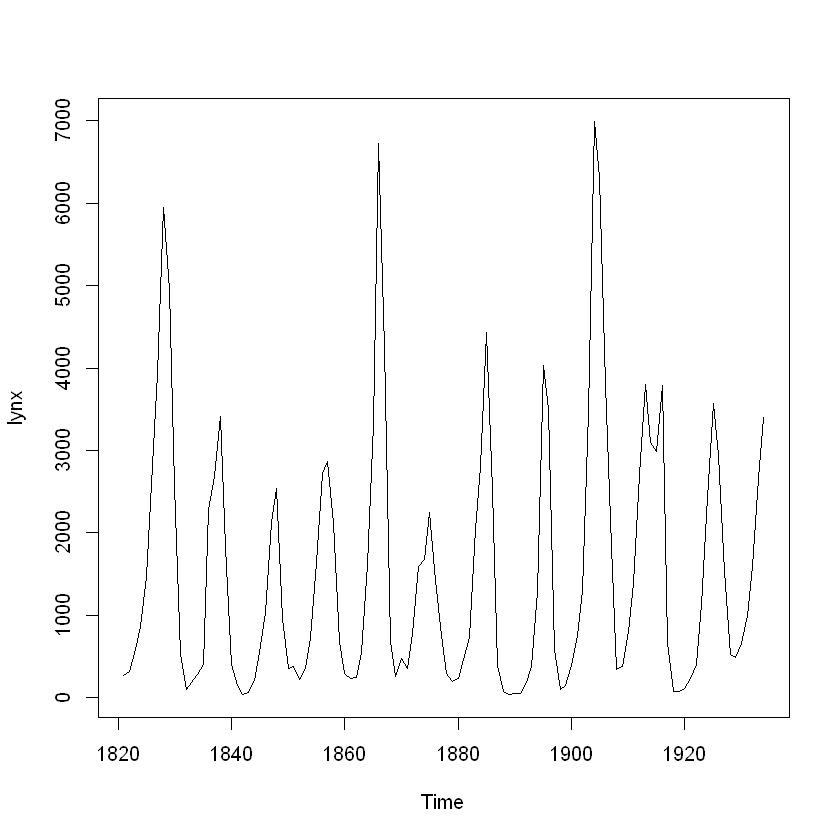

In [2]:
plot(lynx)

# Check Stationary

In [3]:
#install.packages('tseries')

library(tseries)

In [4]:
adf.test(lynx)

Warning message in adf.test(lynx):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  lynx
Dickey-Fuller = -6.3068, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


shows that lynx is stationary ts, Now we find p, q values from acf and pacf plots

# Acf and Pacf Plots

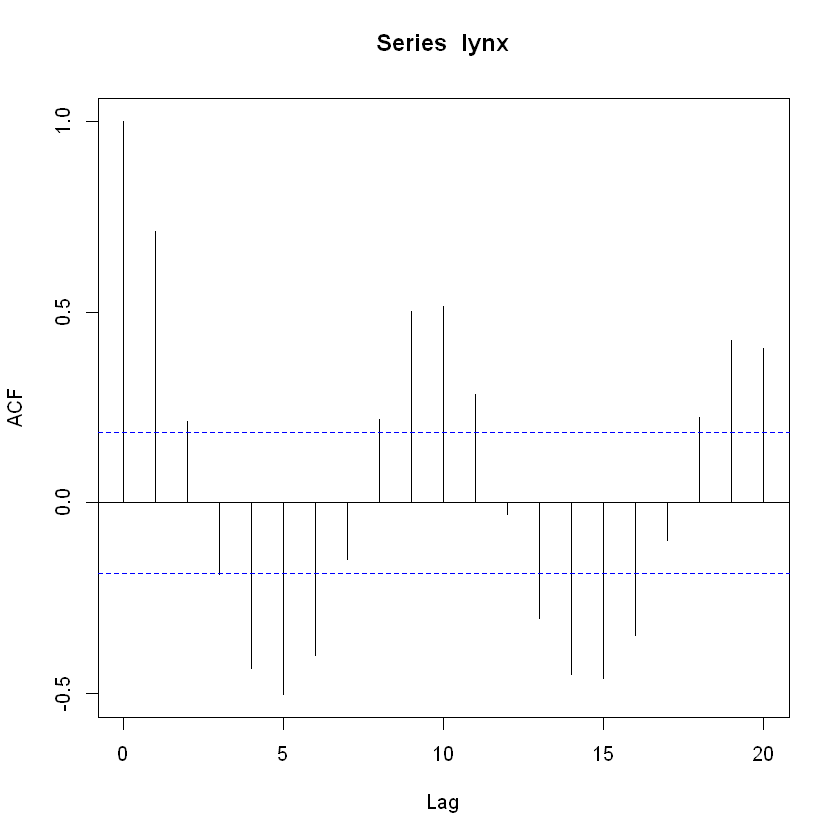

In [5]:
acf(lynx)

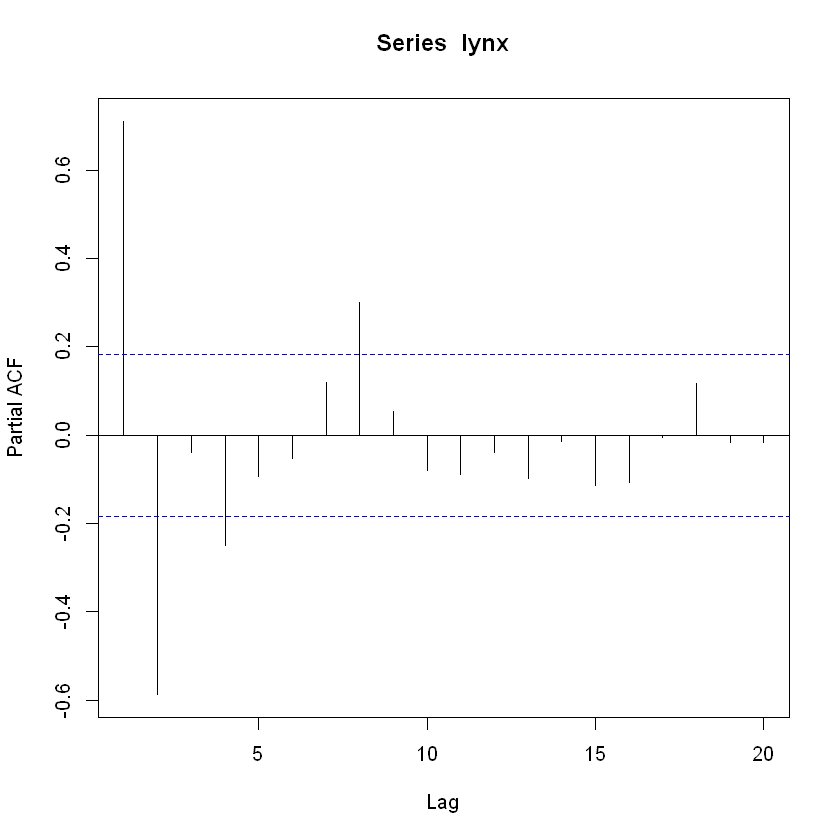

In [6]:
pacf(lynx)

# Acf and Pacf Plots together

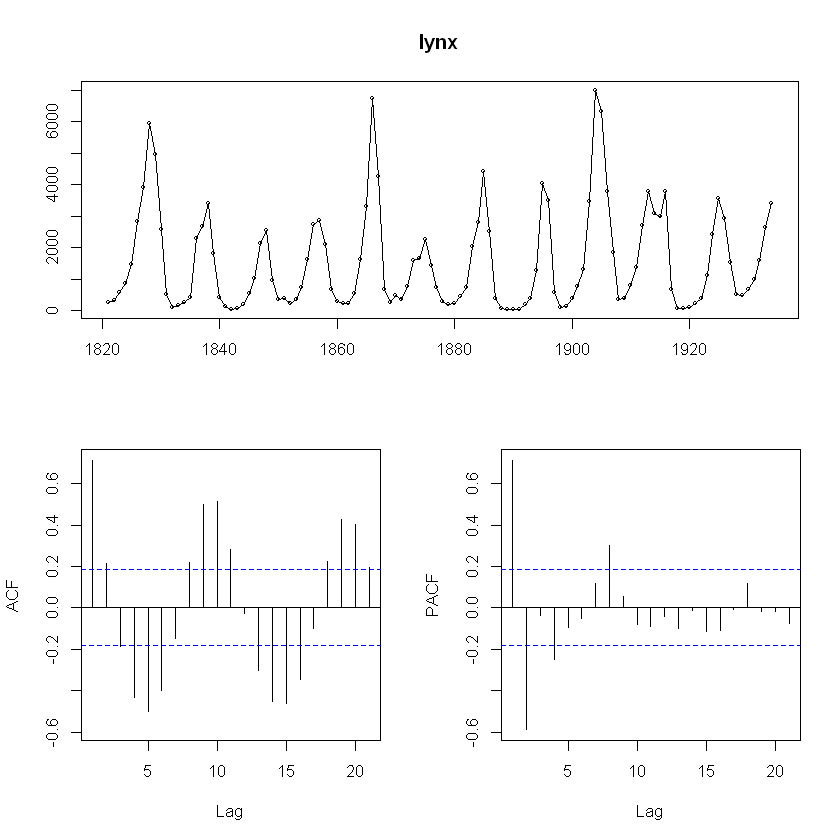

In [7]:
#install.packages("forecast")
library(forecast)
tsdisplay(lynx)

above acf plot shows that several bars are above the threshold line. Which confirms that the ts is autocorrelated. The Pacf plot shows that mainly two lines are above threshold line which indicates that it is atleast AR(2) model.

# Automated way to calculate ARIMA(p, d, q) using auto.arima()
we will also manually find value of p and q later

In [8]:
auto.arima(lynx)

Series: lynx 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1      ma2       mean
      1.3421  -0.6738  -0.2027  -0.2564  1544.4039
s.e.  0.0984   0.0801   0.1261   0.1097   131.9242

sigma^2 estimated as 761965:  log likelihood=-932.08
AIC=1876.17   AICc=1876.95   BIC=1892.58

auto.arima() function has lots of options to consider while creating model.

# Lists of possible model using auto.arima()

In [9]:
# Its giving us models with values of AICs. Choose the model with least AICc
auto.arima(lynx, trace = TRUE)


 ARIMA(2,0,2) with non-zero mean : 1876.952
 ARIMA(0,0,0) with non-zero mean : 2006.724
 ARIMA(1,0,0) with non-zero mean : 1927.209
 ARIMA(0,0,1) with non-zero mean : 1918.165
 ARIMA(0,0,0) with zero mean     : 2080.721
 ARIMA(1,0,2) with non-zero mean : 1888.757
 ARIMA(3,0,2) with non-zero mean : 1878.603
 ARIMA(2,0,1) with non-zero mean : 1880.014
 ARIMA(2,0,3) with non-zero mean : Inf
 ARIMA(1,0,1) with non-zero mean : 1891.442
 ARIMA(3,0,3) with non-zero mean : 1881.515
 ARIMA(2,0,2) with zero mean     : 1905.595

 Best model: ARIMA(2,0,2) with non-zero mean 



Series: lynx 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1      ma2       mean
      1.3421  -0.6738  -0.2027  -0.2564  1544.4039
s.e.  0.0984   0.0801   0.1261   0.1097   131.9242

sigma^2 estimated as 761965:  log likelihood=-932.08
AIC=1876.17   AICc=1876.95   BIC=1892.58

# Using other options in auto.arima() function

In [10]:
auto.arima(lynx, trace = TRUE, stepwise = FALSE, approximation = FALSE)


 ARIMA(0,0,0) with zero mean     : 2080.721
 ARIMA(0,0,0) with non-zero mean : 2006.724
 ARIMA(0,0,1) with zero mean     : 1972.791
 ARIMA(0,0,1) with non-zero mean : 1918.165
 ARIMA(0,0,2) with zero mean     : 1925.15
 ARIMA(0,0,2) with non-zero mean : 1890.428
 ARIMA(0,0,3) with zero mean     : 1913.118
 ARIMA(0,0,3) with non-zero mean : 1888.326
 ARIMA(0,0,4) with zero mean     : 1906.524
 ARIMA(0,0,4) with non-zero mean : 1889.064
 ARIMA(0,0,5) with zero mean     : 1908.619
 ARIMA(0,0,5) with non-zero mean : 1886.754
 ARIMA(1,0,0) with zero mean     : 1934.647
 ARIMA(1,0,0) with non-zero mean : 1927.209
 ARIMA(1,0,1) with zero mean     : 1903.345
 ARIMA(1,0,1) with non-zero mean : 1891.442
 ARIMA(1,0,2) with zero mean     : 1903.567
 ARIMA(1,0,2) with non-zero mean : 1888.757
 ARIMA(1,0,3) with zero mean     : 1905.59
 ARIMA(1,0,3) with non-zero mean : 1890.03
 ARIMA(1,0,4) with zero mean     : 1907.578
 ARIMA(1,0,4) with non-zero mean : Inf
 ARIMA(2,0,0) with zero mean     : 1906

Series: lynx 
ARIMA(4,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4       mean
      1.1246  -0.7174  0.2634  -0.2543  1547.3859
s.e.  0.0903   0.1367  0.1361   0.0897   136.8501

sigma^2 estimated as 748457:  log likelihood=-931.11
AIC=1874.22   AICc=1875.01   BIC=1890.64

Its giving us AR(4) model with lowest AICc. Which is good. Above steps are to choose arima parameters, below are steps to create model using those parameters.

# Creating Model

In [11]:
# We supposed that 2,0,0 is best parameters for now
myarima <- arima(lynx, order = c(2, 0, 0))
myarima


Call:
arima(x = lynx, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.1474  -0.5997  1545.4458
s.e.  0.0742   0.0740   181.6736

sigma^2 estimated as 768159:  log likelihood = -935.02,  aic = 1878.03

The model equation is 
Yt = C + phi1*Yt-1 + phi2*Yt-2 + et

In [12]:
tail(lynx)

Time Series:
Start = 1929 
End = 1934 
Frequency = 1 
[1]  485  662 1000 1590 2657 3396

From above:
Yt = 3396, Yt-1 = 2657, Yt-2 = 1590, phi1 = 1.1474, phi2 = -0.5997
We need C and et. From above model summary the mean of the model is = 1545.4458, which is not C value. So we have to modify the model equation to solve this problem.

In reality the modified equation looks like below. where m = mean

Yt - m = phi1(Yt-1 - m) + phi2(Yt-2 - m) + et

Now what is et?
et is error term = actual-predicted

In [13]:
residuals(myarima)

Time Series:
Start = 1821 
End = 1934 
Frequency = 1 
  [1]  -711.715800  -247.179068  -321.014839  -306.751202   127.414827
  [6]   951.890591   876.687792  2428.733153  -212.432514  -237.541926
 [11]  -164.223204   344.415030  -313.801319  -572.372533  -499.800869
 [16]  1284.008241  -390.614888   999.532714 -1176.312892  -338.411239
 [21]    76.614594  -581.986383  -592.092428  -537.056449  -356.640535
 [26]  -164.773680   572.140125    13.626146 -1375.059569    84.838236
 [31]  -162.287575  -690.094698  -371.088497  -246.153634   316.113199
 [36]   584.894187    27.600121  -240.002495  -724.567794    85.994521
 [41]  -395.876984  -545.490420  -286.601293   437.533551  1080.751334
 [46]  3196.206424 -2171.180547  -862.324669  1319.008240  -106.590562
 [51]  -730.821550   -42.121950   210.099599  -381.832131   584.871735
 [56]  -850.724879  -229.236651  -412.244306  -387.695328  -521.330158
 [61]  -372.233398  -363.825181   779.748247   210.328753  1731.217687
 [66] -1586.424626  -53

from above et = 601.838001(the last value in residuals)

In [14]:
# Modified equation values are
RHS = (2657-1545.45)*1.147 - (1590-1545.45)*0.6 + 601.84
LHS = 3396-1545.45
LHS;RHS

[1] 1850.55

[1] 1850.058

Yes, they are equal.It means the equation works

# How would the model looks like if it is MA(0, 0, 2) model?

In [15]:
# MA(0, 0, 2) is MA(2)
myarima <- arima(lynx, order = c(0, 0, 2))
myarima
residuals(myarima)


Call:
arima(x = lynx, order = c(0, 0, 2))

Coefficients:
         ma1     ma2  intercept
      1.1407  0.4697  1545.3670
s.e.  0.0776  0.0721   224.5215

sigma^2 estimated as 855092:  log likelihood = -941.03,  aic = 1890.06

Time Series:
Start = 1821 
End = 1934 
Frequency = 1 
  [1]  -803.732851  -316.819775  -339.796973  -153.575542   256.164758
  [6]  1051.017490  1062.665677  2690.592373  -162.936784   -44.605977
 [11]  -894.921151  -405.552321  -478.418368  -530.135762  -306.914693
 [16]  1338.739662  -243.365541  1512.454318 -1332.377780  -326.856600
 [21]  -395.701695  -895.452231  -270.030612  -603.745610  -183.818830
 [26]   -19.103090   691.762826   210.483679 -1153.389638    32.488716
 [31]  -663.690549  -578.528068  -213.686644  -298.876138   533.939929
 [36]   710.925757   263.863961   -61.283359  -915.393384  -173.356483
 [41]  -681.659497  -441.346353  -169.735507   478.553892  1299.450551
 [46]  3468.524287 -1858.394332  -367.558957     1.794961  -901.775190
 [51]  -159.518680  -155.841195   301.331932  -139.911234   723.702215
 [56]  -879.208277  -126.335608  -689.293961  -498.722732  -423.698105
 [61]  -358.791482  -201.071547   894.524832   339.653953  2078.024947
 [66] -1564.386859  -34

The MA(2) model equation is:

Yt = C + theta*et-1 + theta2*et-2 + et

the modified equation is:

Yt-m =  theta1*et-1 + theta2*et-2 +et # e are error terms

In [16]:
RHS = 1.141*844.72 + 255.91*0.47 + 766.83
LHS = 3396-1545.37
RHS;LHS

[1] 1850.933

[1] 1850.63

It looks our model works.

# Simulating ARIMA model in R

We can create sample ARIMA model by simulating

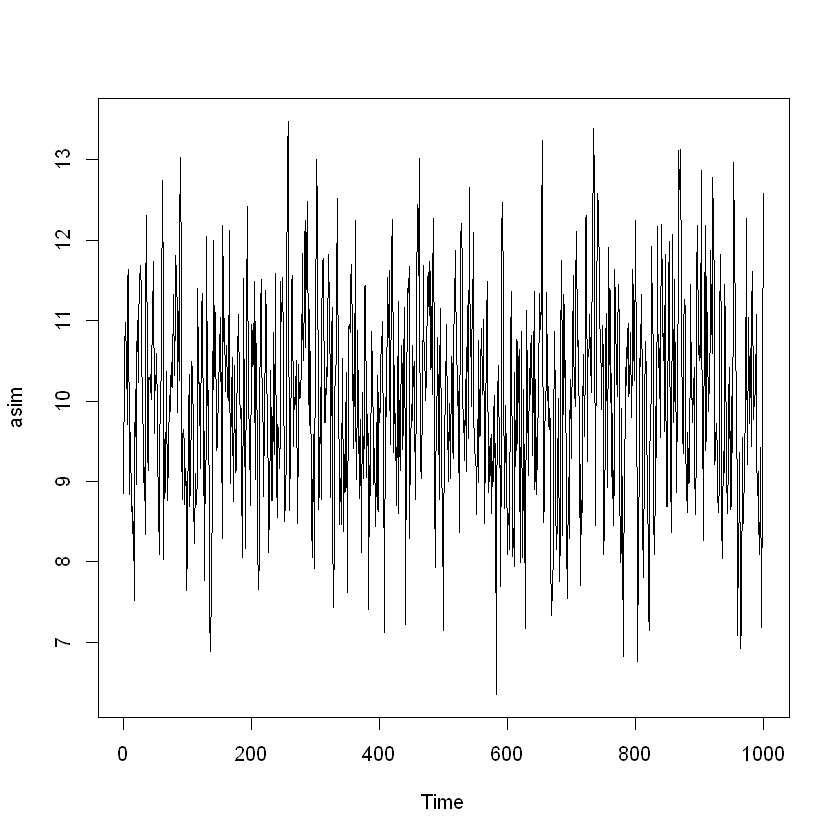

In [17]:
set.seed(123)
# simulate at least n of 1000
# Here 0.3, 0.4 are ar and ma coefficients, 10 is mean as a 
#pseudo constant for the model
asim <- arima.sim(model = list(order = c(1, 0, 1), 
                               ar = c(0.4), 
                               ma =c(0.3)), 
                  n = 1000) + 10
plot(asim)


In [18]:
# Lets see our data with moving average, 50 days moving average first
library(zoo)



Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



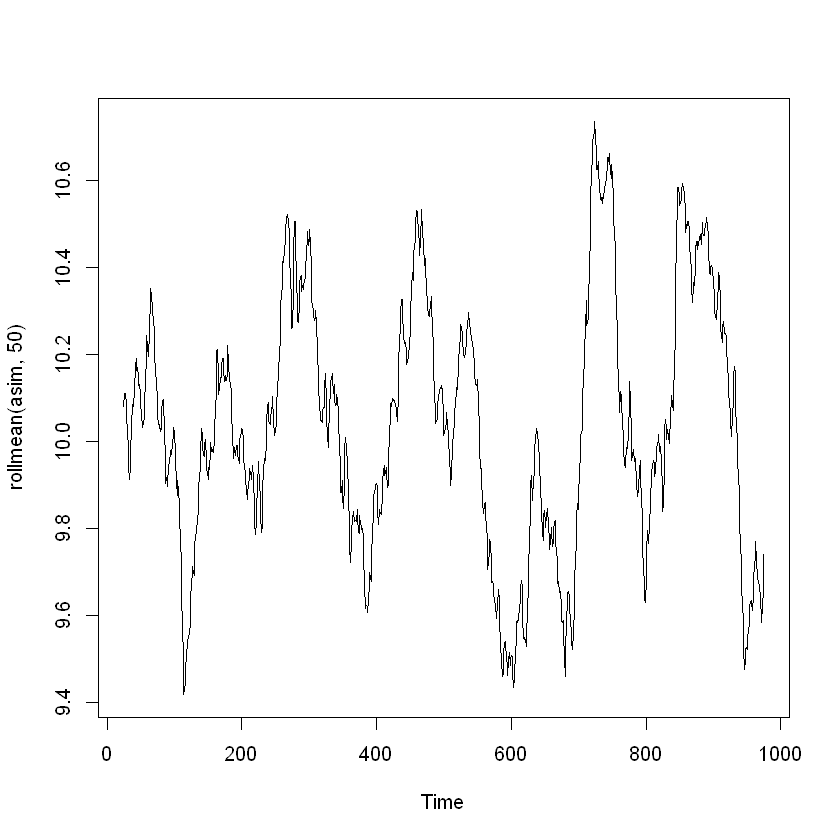

In [19]:
plot(rollmean(asim, 50))

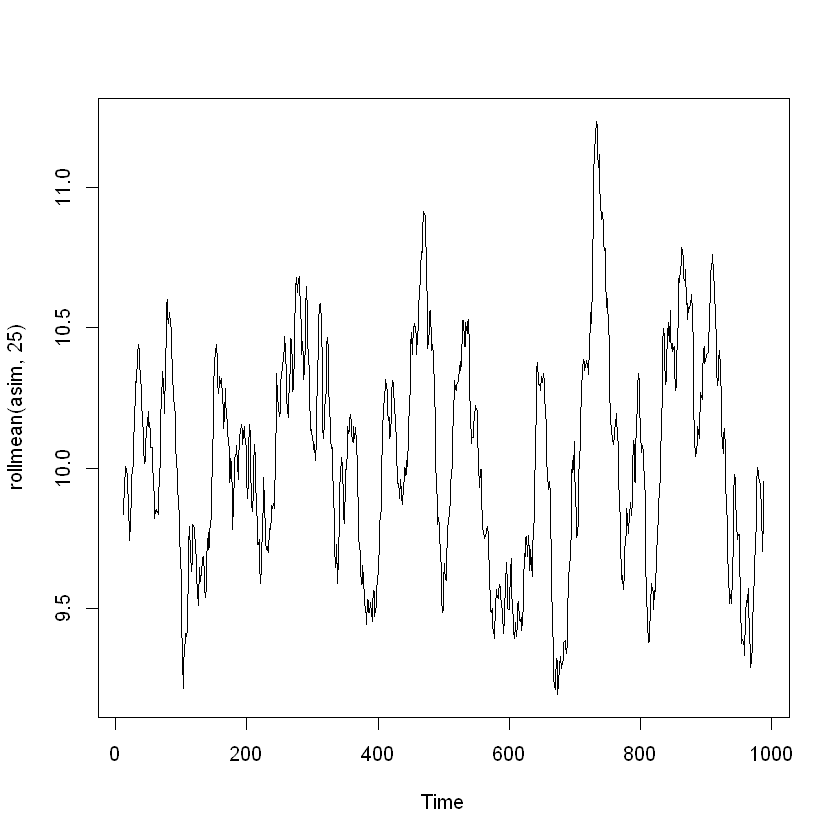

In [20]:
#lets use moving average of days 25
plot(rollmean(asim, 25))


In [21]:
# Lets check the stationary
library(tseries)
adf.test(asim)

Warning message in adf.test(asim):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  asim
Dickey-Fuller = -9.0113, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Shows the data is stationary

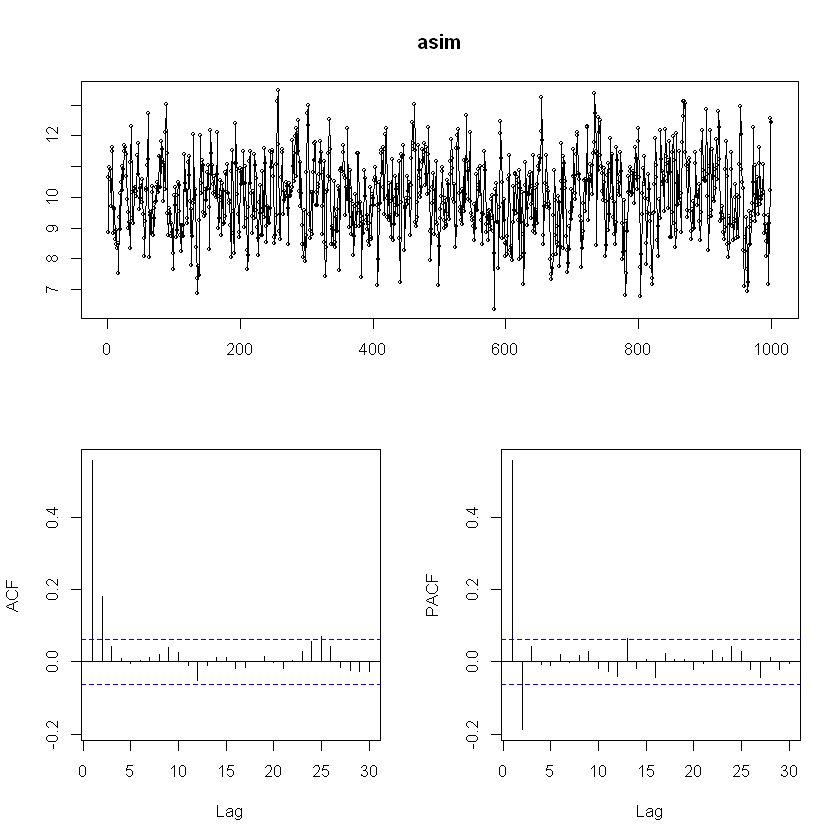

In [22]:
# Lets see ADF and PACF plots for autocorrelation
library(forecast)
tsdisplay(asim)


In [24]:
# Lets check with auto.arima()
# Lets see if this gives us the value we used to simulate the arima ts or not.Just for checking
auto.arima(asim, trace = T, stepwise = F, approximation = F)


 ARIMA(0,0,0) with zero mean     : 7465.459
 ARIMA(0,0,0) with non-zero mean : 3241.528
 ARIMA(0,0,1) with zero mean     : 6218.948
 ARIMA(0,0,1) with non-zero mean : 2878.74
 ARIMA(0,0,2) with zero mean     : 5341.968
 ARIMA(0,0,2) with non-zero mean : 2836.895
 ARIMA(0,0,3) with zero mean     : 4809.724
 ARIMA(0,0,3) with non-zero mean : 2837.534
 ARIMA(0,0,4) with zero mean     : 4450.32
 ARIMA(0,0,4) with non-zero mean : 2838.689
 ARIMA(0,0,5) with zero mean     : 4219.275
 ARIMA(0,0,5) with non-zero mean : 2840.557
 ARIMA(1,0,0) with zero mean     : Inf
 ARIMA(1,0,0) with non-zero mean : 2870.637
 ARIMA(1,0,1) with zero mean     : Inf
 ARIMA(1,0,1) with non-zero mean : 2836.047
 ARIMA(1,0,2) with zero mean     : Inf
 ARIMA(1,0,2) with non-zero mean : 2837.165
 ARIMA(1,0,3) with zero mean     : Inf
 ARIMA(1,0,3) with non-zero mean : 2839.088
 ARIMA(1,0,4) with zero mean     : Inf
 ARIMA(1,0,4) with non-zero mean : 2840.615
 ARIMA(2,0,0) with zero mean     : Inf
 ARIMA(2,0,0) with 

Series: asim 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1     mean
      0.3494  0.3183  10.0288
s.e.  0.0478  0.0473   0.0637

sigma^2 estimated as 0.9927:  log likelihood=-1414
AIC=2836.01   AICc=2836.05   BIC=2855.64

# How to manually calculate p, d, q values?
The best idea is to use auto.arima() function to get idea around p, d, q values. after that play around these values to manually choose best p, q values for the model. Keep in mind we choose the model with less AICc value.
Sometime auto.arima() alone is not good for parameter selection.


# Problem with R-base arima() function
This function can not calculate constant value if the TS requ ires the differencing. So the option is Arima() function of ‘forecast’ package.

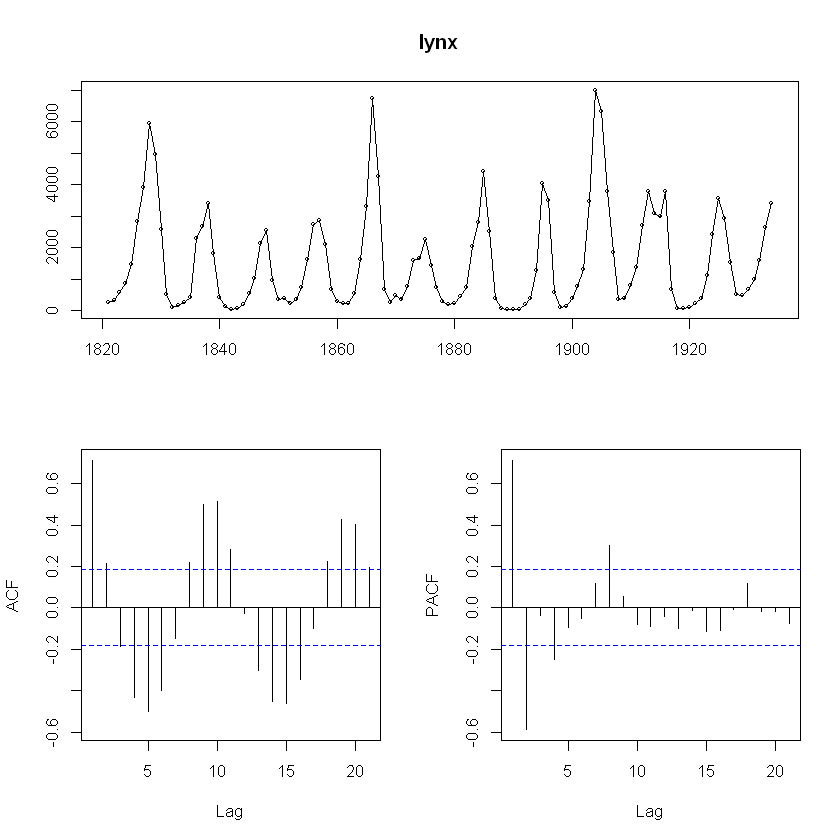

In [25]:
# Again we use lynx data set to choose p,q values manually
library(forecast)
tsdisplay(lynx)


The Pacf plot shows that it probably the (2, 0, 0), it could be different but lets check this vlaues first. We know this data set has stationary. So d = 0

In [26]:
# Model building
library(forecast)
myarima <- Arima(lynx, order = c(2, 0, 0))
summary(myarima)

Series: lynx 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2       mean
      1.1474  -0.5997  1545.4458
s.e.  0.0742   0.0740   181.6736

sigma^2 estimated as 788920:  log likelihood=-935.02
AIC=1878.03   AICc=1878.4   BIC=1888.98

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3615075 876.4468 631.7405 -74.99125 153.9046 0.7603467
                     ACF1
Training set -0.008188618


# Residual checking of model



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 19.603, df = 7, p-value = 0.006494

Model df: 3.   Total lags used: 10



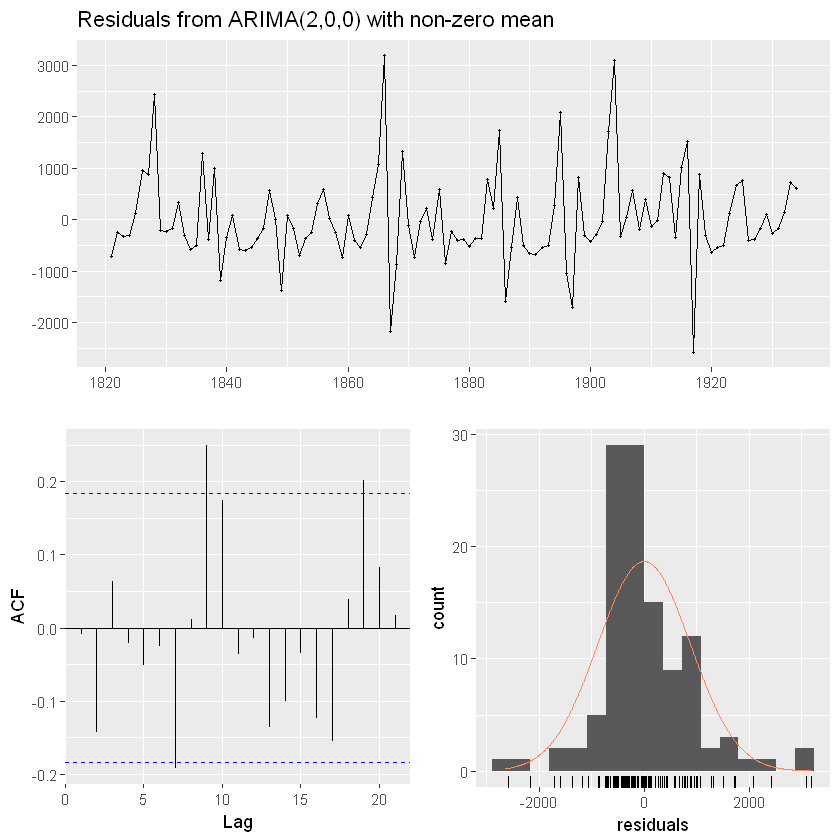

In [27]:
library(forecast)
checkresiduals(myarima)

The acf plot of residual shows that there is still the autocorrelation. Lets play with p value to address this condition.

In [28]:
myarima <- Arima(lynx, order = c(3, 0, 0))
summary(myarima)

Series: lynx 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1      ar2      ar3       mean
      1.1318  -0.5702  -0.0256  1545.5884
s.e.  0.0935   0.1306   0.0934   177.1506

sigma^2 estimated as 795560:  log likelihood=-934.98
AIC=1879.96   AICc=1880.51   BIC=1893.64

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.05901059 876.1538 630.2967 -73.17528 152.8511 0.7586091
                     ACF1
Training set 0.0005592603



	Ljung-Box test

data:  Residuals from ARIMA(3,0,0) with non-zero mean
Q* = 19.786, df = 6, p-value = 0.003023

Model df: 4.   Total lags used: 10



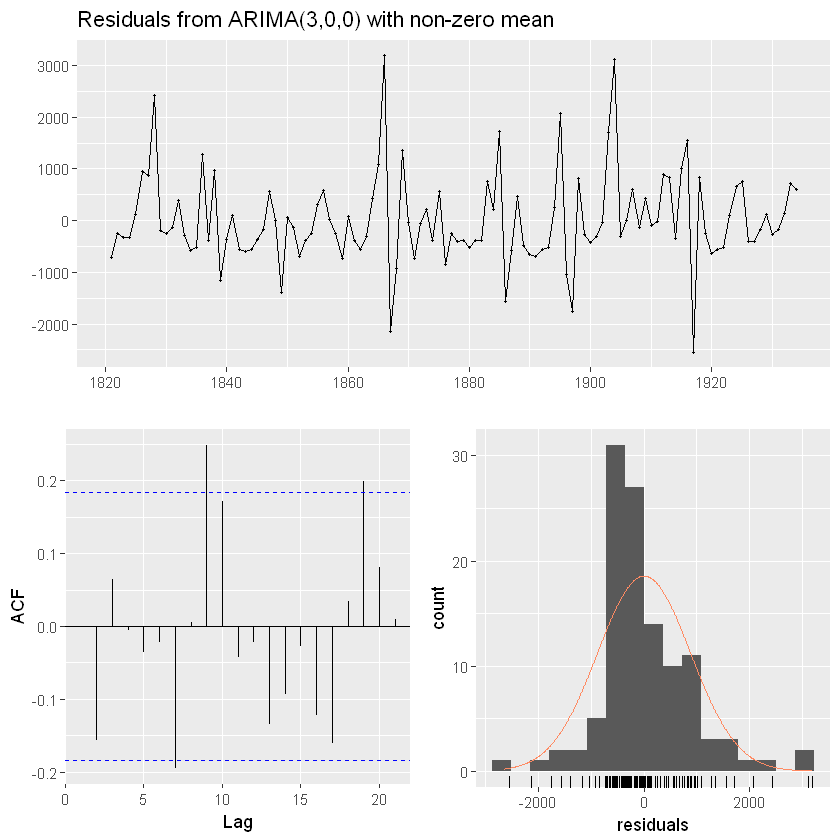

In [29]:
checkresiduals(myarima)

Among two models the first one (2, 0, 0) has low AICc so that is the best among two.
Lets see the Arima(4, 0, 0)

In [30]:
myarima <- Arima(lynx, order = c(4, 0, 0))
summary(myarima)

Series: lynx 
ARIMA(4,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4       mean
      1.1246  -0.7174  0.2634  -0.2543  1547.3859
s.e.  0.0903   0.1367  0.1361   0.0897   136.8501

sigma^2 estimated as 748457:  log likelihood=-931.11
AIC=1874.22   AICc=1875.01   BIC=1890.64

Training set error measures:
                    ME    RMSE      MAE       MPE     MAPE      MASE
Training set -3.075395 845.949 595.9818 -55.59226 128.7656 0.7173084
                    ACF1
Training set -0.01587225



	Ljung-Box test

data:  Residuals from ARIMA(4,0,0) with non-zero mean
Q* = 13.201, df = 5, p-value = 0.02157

Model df: 5.   Total lags used: 10



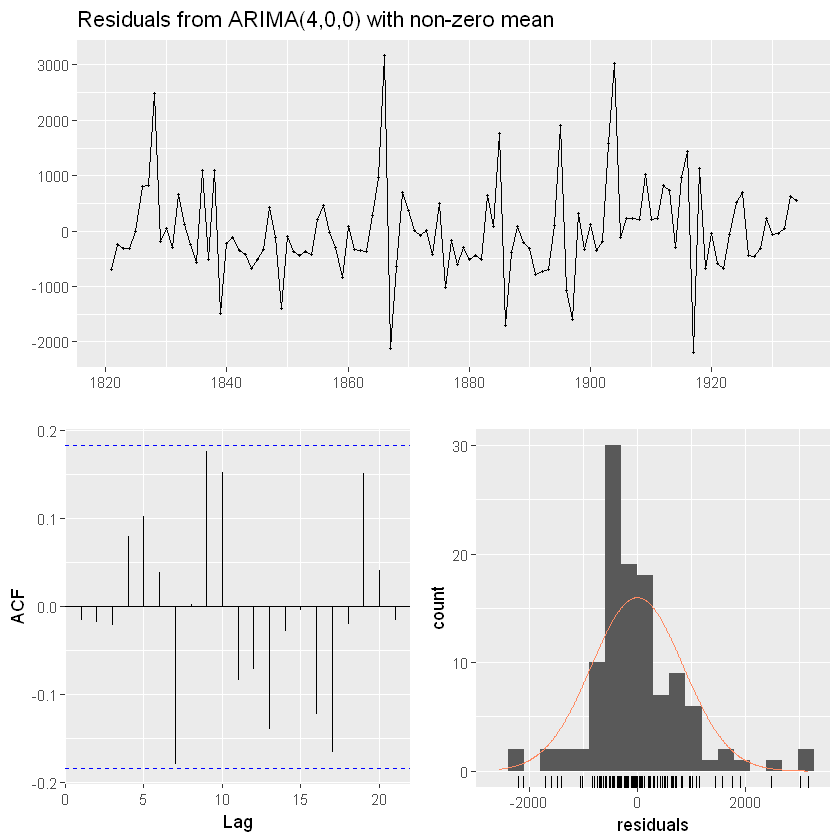

In [31]:
checkresiduals(myarima)

It has lowest AICc among three so this one is the best until now. It has also no lines above threshold in ACF plot. Although the plot seems not so normal than others, it is close enough.
Similarly we can test other values of p. But now we leave here


# Prediction on ARIMA model
Lets use the lynx data, make model with auto.arima() and forecast. This model is choosed just for understanding the forecasting.

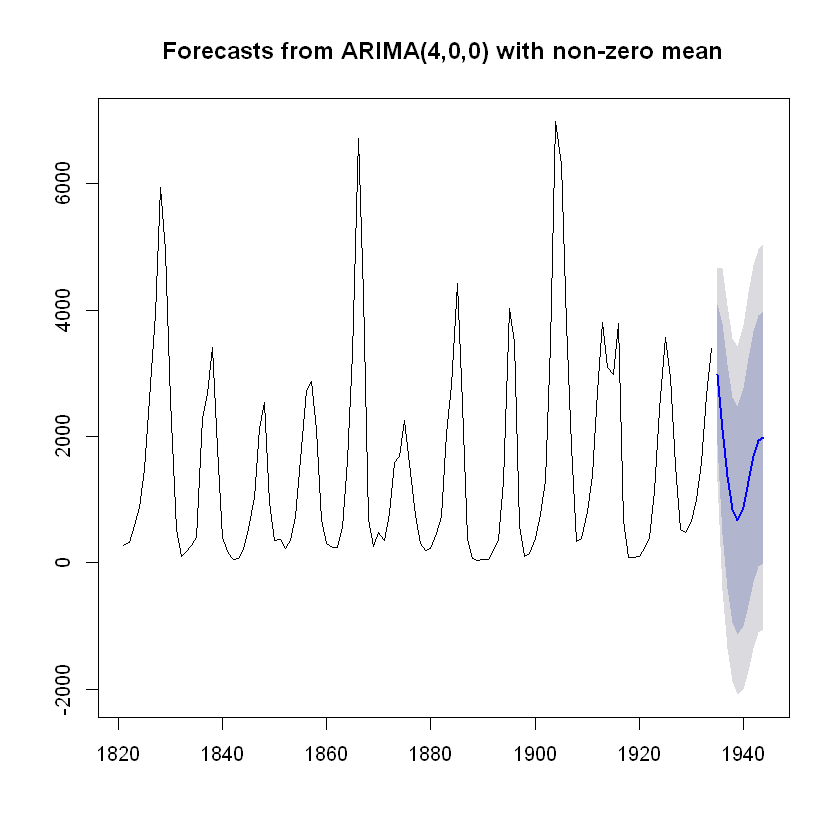

In [32]:
myarima <- auto.arima(lynx,
                      stepwise = F, 
                      approximation = F)
# This is yearly data set, h = 10 means, lets forecast the next 10 years
library(forecast)
arimafore <- forecast(myarima, h = 10)
plot(arimafore)


In [33]:
summary(arimafore)


Forecast method: ARIMA(4,0,0) with non-zero mean

Model Information:
Series: lynx 
ARIMA(4,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4       mean
      1.1246  -0.7174  0.2634  -0.2543  1547.3859
s.e.  0.0903   0.1367  0.1361   0.0897   136.8501

sigma^2 estimated as 748457:  log likelihood=-931.11
AIC=1874.22   AICc=1875.01   BIC=1890.64

Error measures:
                    ME    RMSE      MAE       MPE     MAPE      MASE
Training set -3.075395 845.949 595.9818 -55.59226 128.7656 0.7173084
                    ACF1
Training set -0.01587225

Forecasts:
     Point Forecast        Lo 80    Hi 80      Lo 95    Hi 95
1935      2980.7782  1872.064458 4089.492  1285.1469 4676.410
1936      2114.6447   446.136392 3783.153  -437.1186 4666.408
1937      1361.7211  -413.725499 3137.168 -1353.5901 4077.032
1938       839.0137  -938.235509 2616.263 -1879.0544 3557.082
1939       668.7873 -1133.427818 2471.002 -2087.4629 3425.038
1940       874.3079 -1010.219757 2

# See the 10 forecasted values

In [34]:
arimafore$mean

Time Series:
Start = 1935 
End = 1944 
Frequency = 1 
 [1] 2980.7782 2114.6447 1361.7211  839.0137  668.7873  874.3079 1281.3753
 [8] 1679.8363 1933.3503 1987.5494

# Plot last observationas and the forcasted values


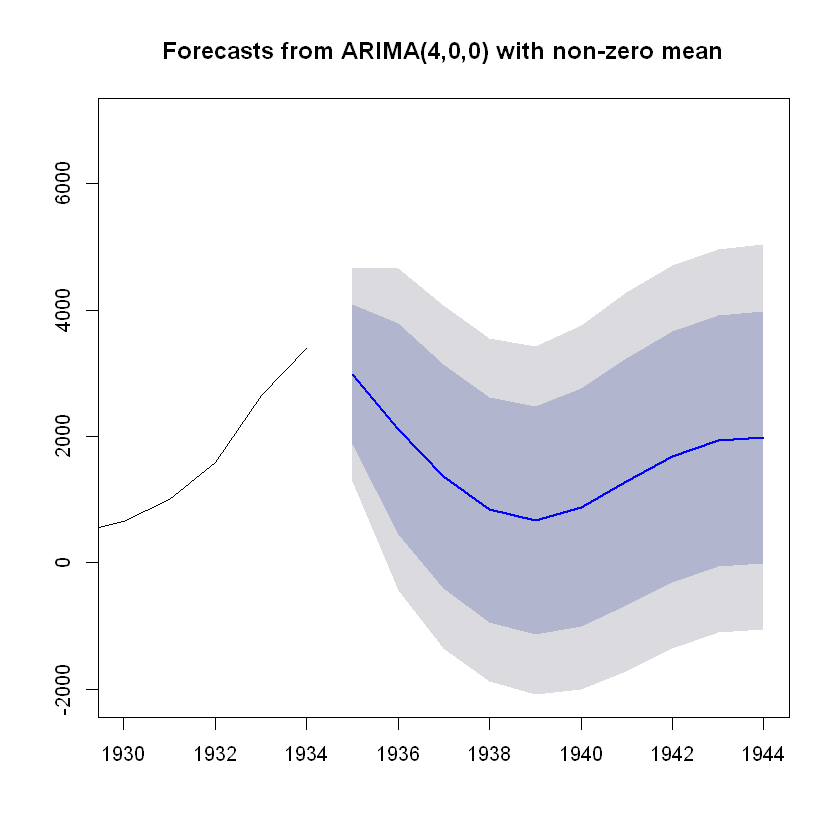

In [35]:
plot(arimafore, xlim = c(1930, 1944))

# Lets See how exponential smoothing model works for us


In [36]:
# Create ets model
myets <- ets(lynx)
# Forecasting
etsfore <- forecast(myets, h = 10)

# Lets compare two forecasted models with ggplot

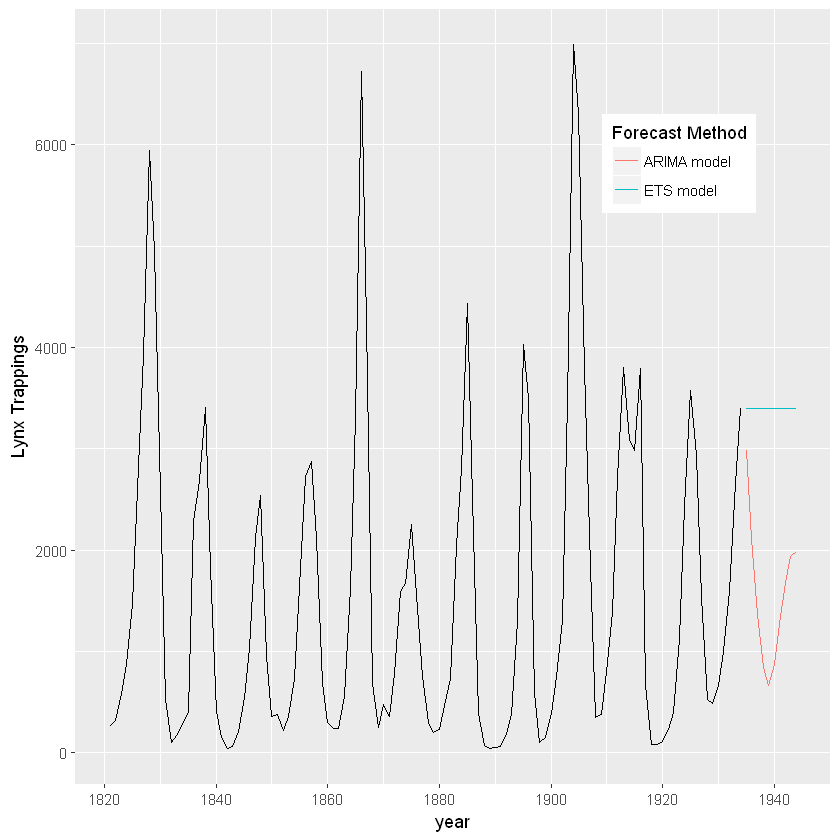

In [37]:

library(ggplot2)
autoplot(lynx) + forecast::autolayer(etsfore$mean, series = 'ETS model') + 
    forecast::autolayer(arimafore$mean, series = "ARIMA model") + 
    xlab('year') + ylab('Lynx Trappings') +
    guides(
        colour = guide_legend(title =  "Forecast Method")) + theme(legend.position = c(0.8, 0.8))


ETS model is not working good here. ARIMA model is best here Visualization is im;portant

# Dealing with explanatory variable in ARIMA

In [38]:
fish <- read.csv("cyprinidae.csv")
head(fish)

X,concentration,predator_presence
1,11.240482,FALSE
2,10.294277,FALSE
3,232.000000,TRUE
4,10.626500,FALSE
5,10.323206,FALSE
6,8.514967,FALSE


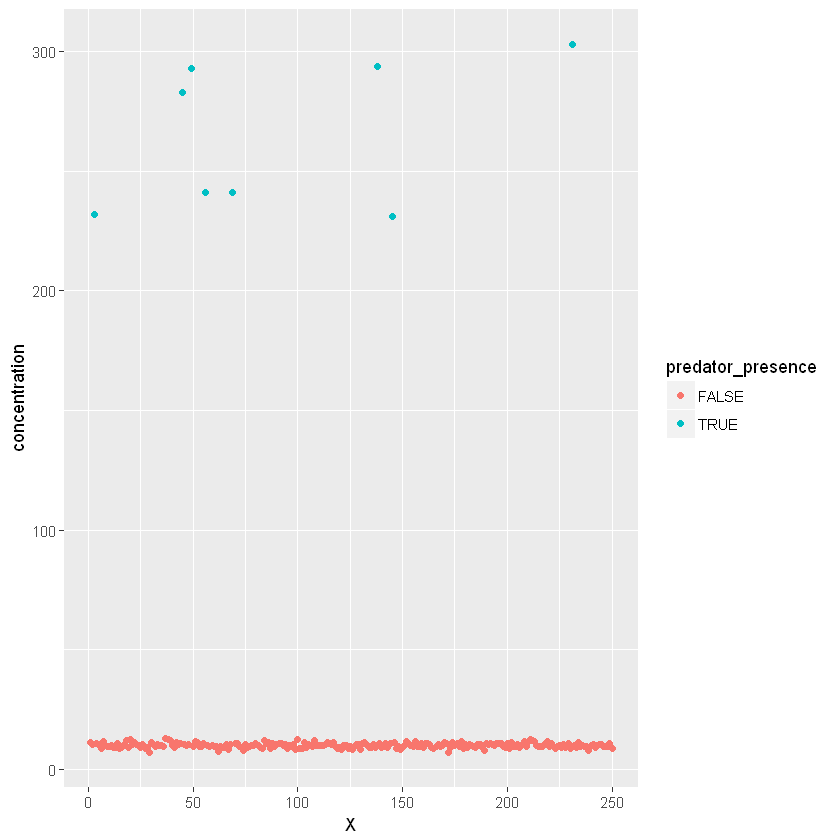

In [39]:
library(ggplot2)
ggplot(aes(X, concentration), data = fish) + geom_point() + 
    aes(colour = predator_presence)

In [40]:
# Convert to time series
class(fish)
# Since fish is data frame, change it to time series
x = ts(fish$concentration)
y = fish$predator_presence
class(x)

[1] "data.frame"

[1] "ts"

# Model creation of this fish data with explanatory variable

In [41]:
# The xreg function allows us to use explanatory variable while model building
library(forecast)
mymodel <- auto.arima(x, xreg = y, 
                      stepwise = F, 
                      approximation = F)
mymodel


Series: x 
Regression with ARIMA(0,0,0) errors 

Coefficients:
      intercept      xreg
         9.9765  254.7735
s.e.     0.3409    1.9059

sigma^2 estimated as 28.36:  log likelihood=-771.84
AIC=1549.68   AICc=1549.77   BIC=1560.24


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,0,0) errors
Q* = 14.122, df = 8, p-value = 0.07865

Model df: 2.   Total lags used: 10



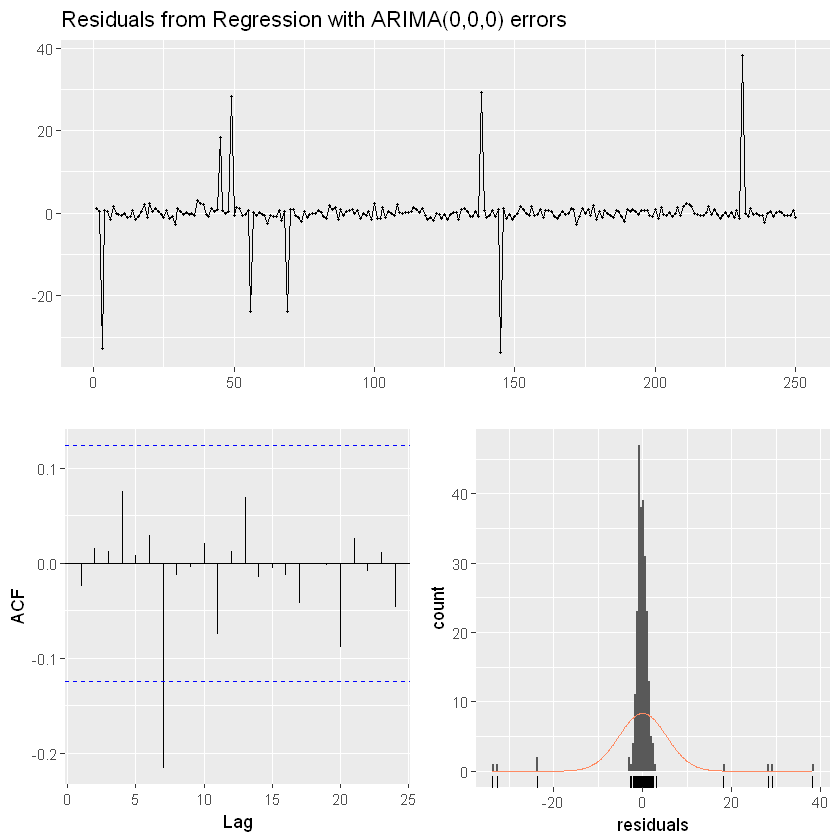

In [42]:
# Check the model residual
#From this we can check if the autocorrelation is still present or not. If present go back and choose right p, q values.
checkresiduals(mymodel)


# Forecasting with explanatory variable

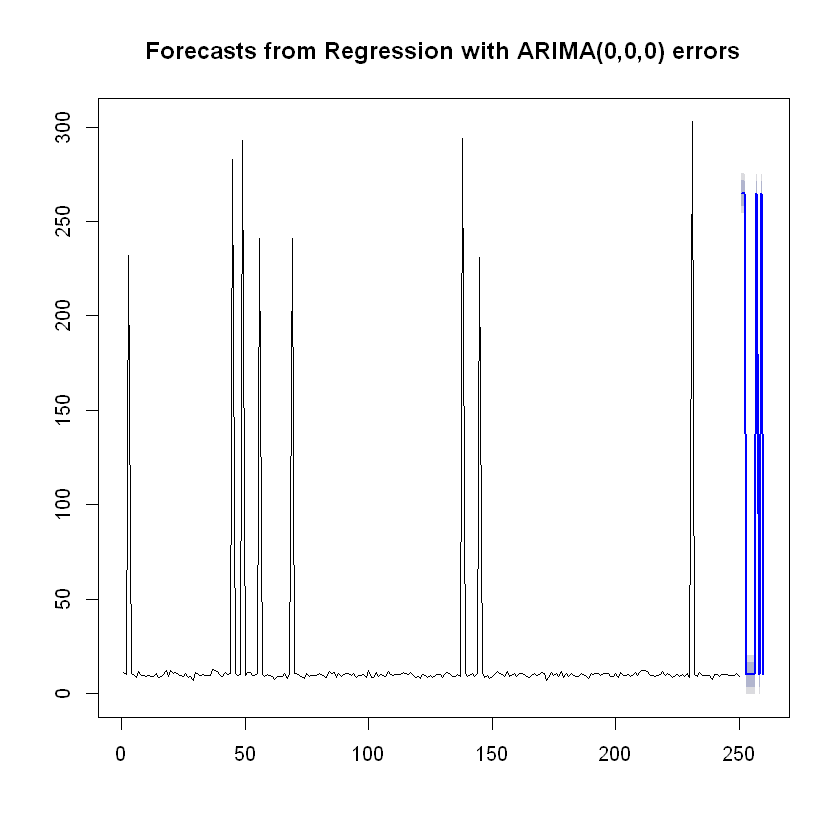

In [43]:
# We want to predict the model based on below explanatory variable. For forcasting next 10 steps
y1 <- c(T, T, F, F, F, F, T, F, T, F)
plot(forecast(mymodel, xreg = y1))

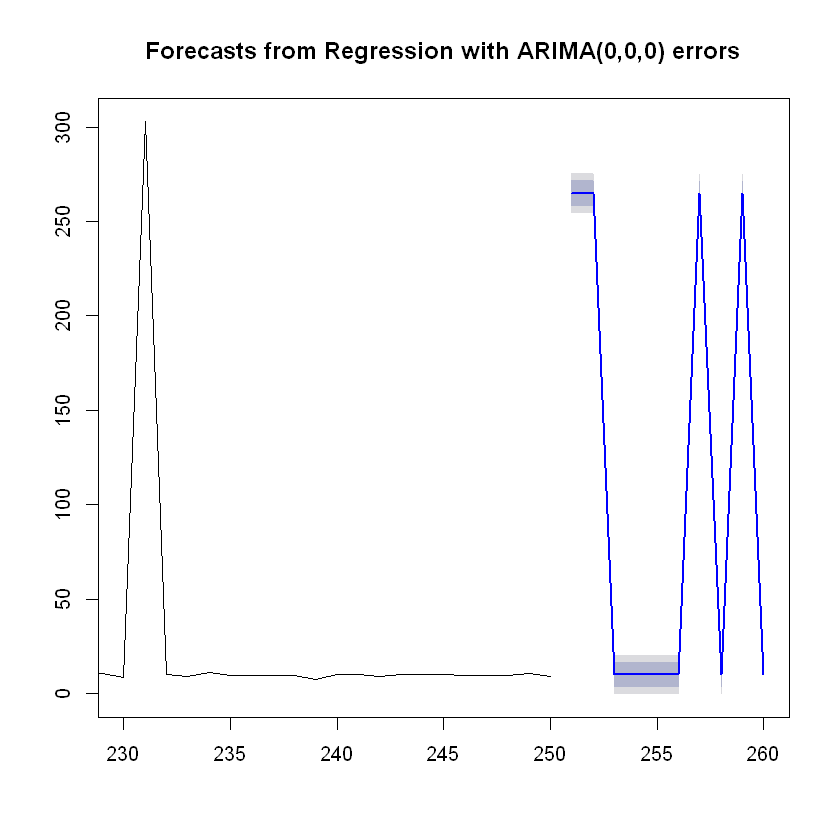

In [44]:
# Only forcasted part is below
plot(forecast(mymodel, xreg = y1), xlim = c(230, 260))